<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd
import numpy as np
##########################################
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
##########################################
import seaborn as sns
sns.set()
##########################################
# might be needed depending on your version of Jupyter
#%config InlineBackend.figure_format = "svg"

In [2]:
from google.colab import files
club_upload = files.upload()

Saving lending_club_info.csv to lending_club_info (1).csv


In [3]:
data_info = pd.read_csv('lending_club_info.csv' , index_col=0)

In [4]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [5]:
from google.colab import files
club_two = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two (1).csv


In [97]:
df = pd.read_csv('lending_club_loan_two.csv')

In [98]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.describe(include= "number").T.loc[:,["count","min","max"]]

,count,min,max
loan_amnt,396030.0,500.00,40000.00
int_rate,396030.0,5.32,30.99
installment,396030.0,16.08,1533.81
annual_inc,396030.0,0.00,8706582.00
dti,396030.0,0.00,9999.00
open_acc,396030.0,0.00,90.00
pub_rec,396030.0,0.00,86.00
revol_bal,396030.0,0.00,1743266.00
revol_util,395754.0,0.00,892.30
total_acc,396030.0,2.00,151.00


In [99]:
df["pub_rec_bankruptcies"].value_counts(dropna=False).sort_values()

,count
pub_rec_bankruptcies,
8.0,2
7.0,4
6.0,7
5.0,32
4.0,82
3.0,351
NaN,535
2.0,1847
1.0,42790


In [100]:
numerical_dtypes = {"loan_amnt":"float32",
                    "int_rate":"float16",
                    "installment":"float32",
                    "annual_inc":"float32",
                    "dti":"float32",
                    "open_acc":"int8",
                    "pub_rec":"int8",
                    "revol_bal":"int16",
                    "revol_util":"float16",
                    "total_acc":"int8",
                    "mort_acc":"Int8",
                    "pub_rec_bankruptcies":"Int8"}

In [101]:
for col in df.select_dtypes(include="number"):
  print(col)

loan_amnt
int_rate
installment
annual_inc
dti
open_acc
pub_rec
revol_bal
revol_util
total_acc
mort_acc
pub_rec_bankruptcies


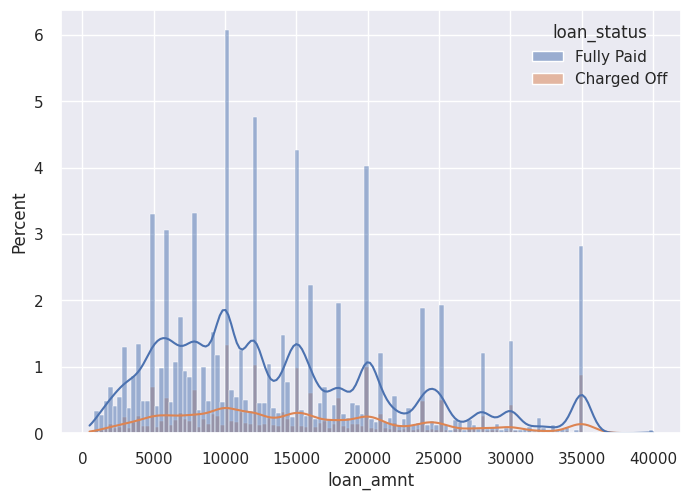

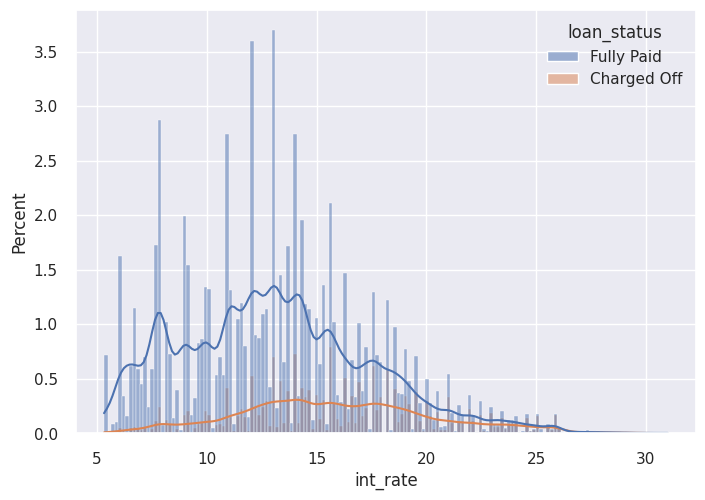

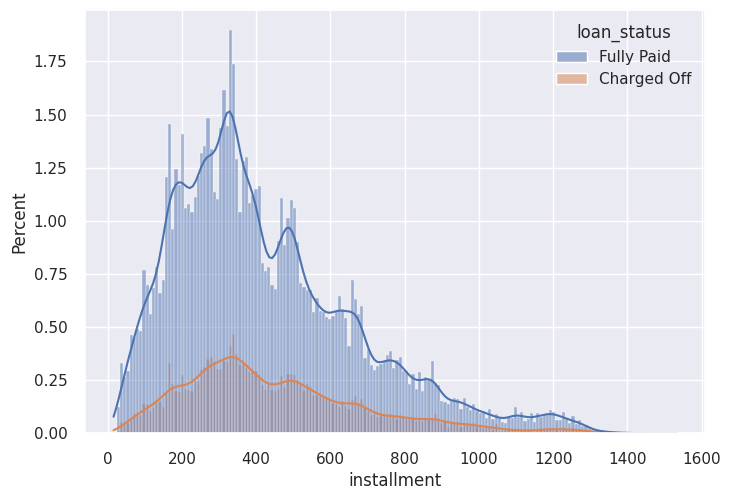

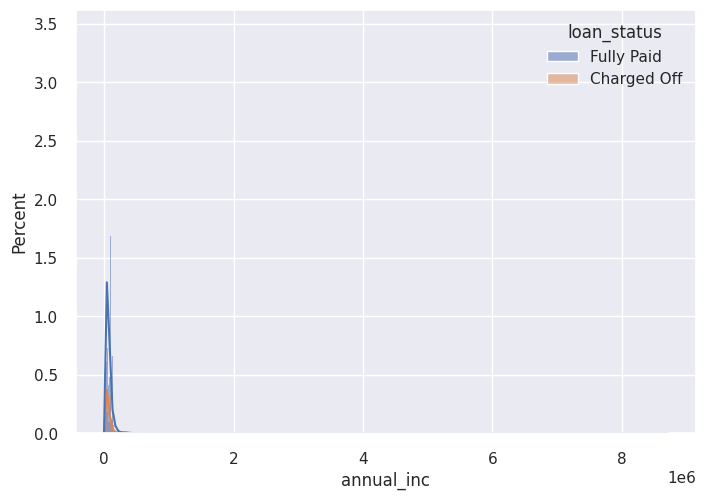

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


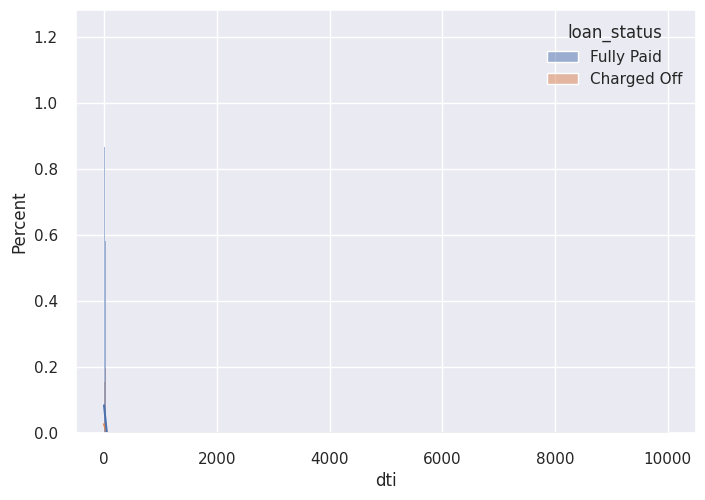

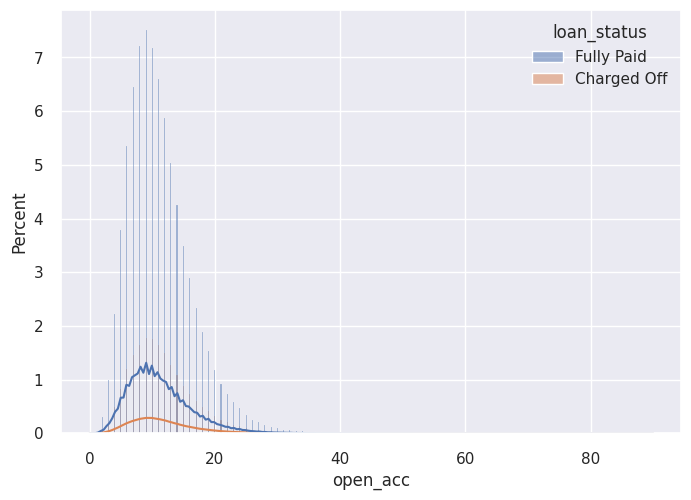

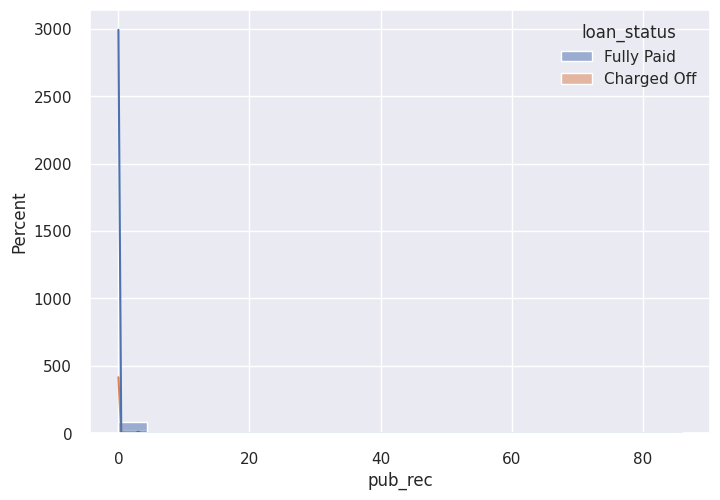

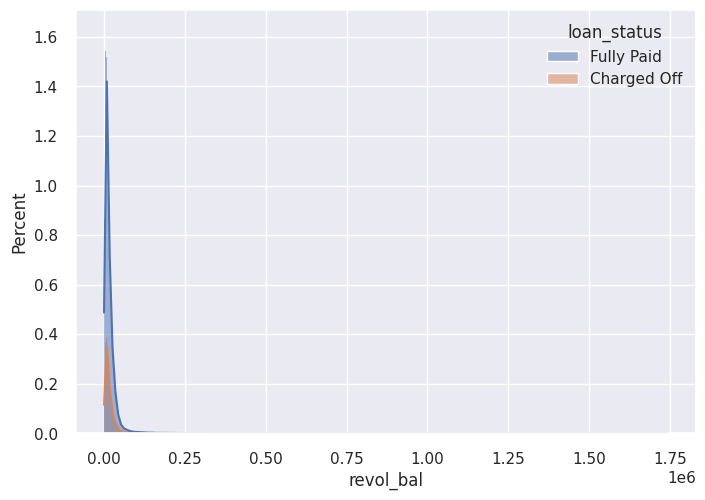

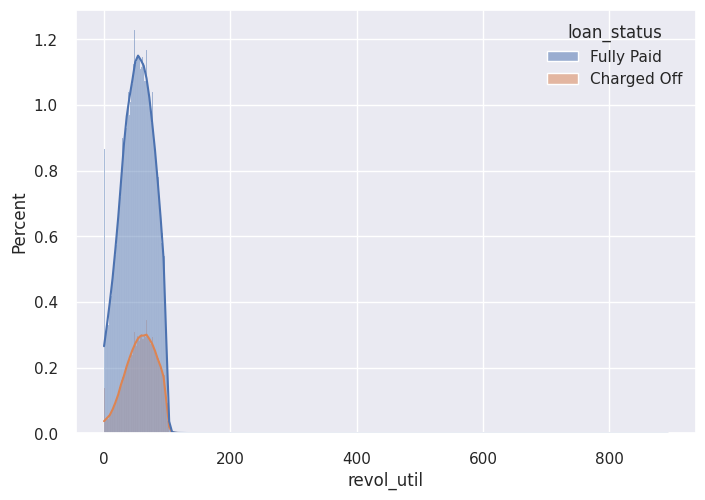

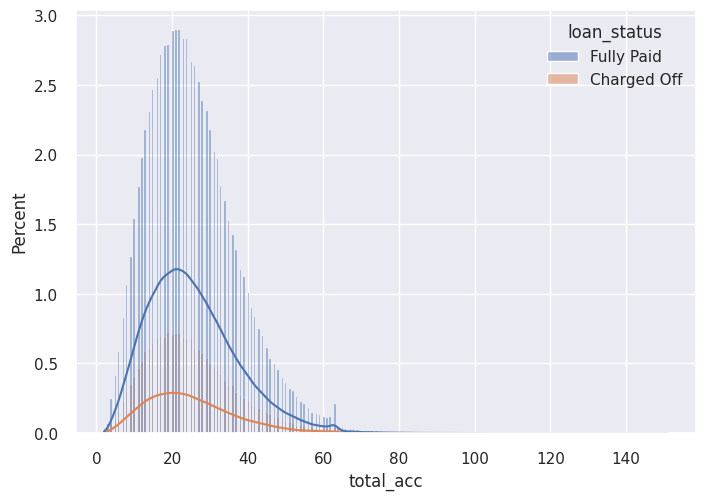

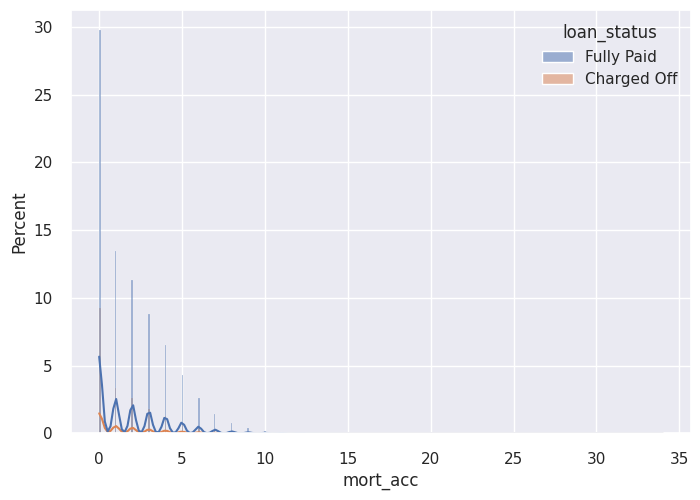

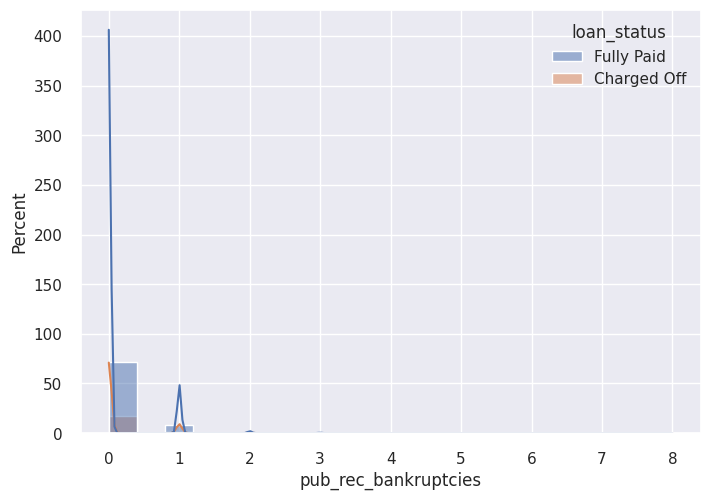

In [13]:
for col in df.select_dtypes(include="number"):
  sns.histplot(df , x = col , hue = "loan_status" , kde = True ,  stat ="percent")
  plt.show()

In [102]:
df.describe(include= "object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [103]:
categorical_dtypes = {"term":"category",
           "grade":"category",
           "sub_grade":"category",
           "emp_length":"category",
           "home_ownership":"category",
           "verification_status":"category",
           "issue_d":"category",
           "loan_status":"category",
           "purpose":"category",
           "initial_list_status":"category",
           "application_type":"category"}

In [104]:
for col in df.select_dtypes(include = "object"):
  print(col)

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
earliest_cr_line
initial_list_status
application_type
address


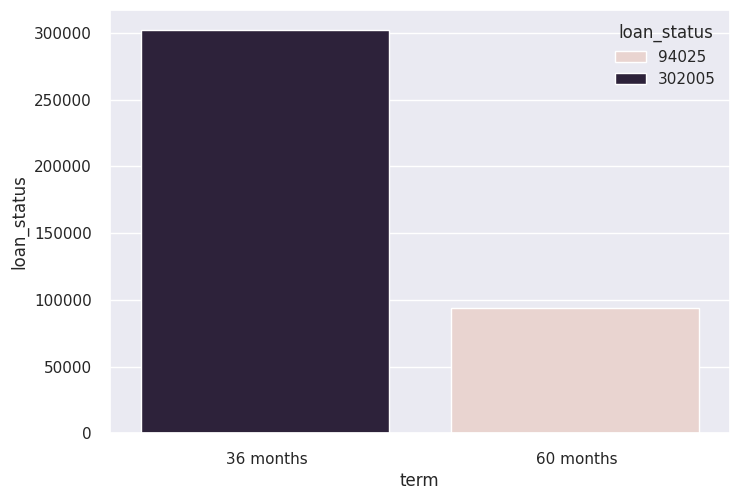

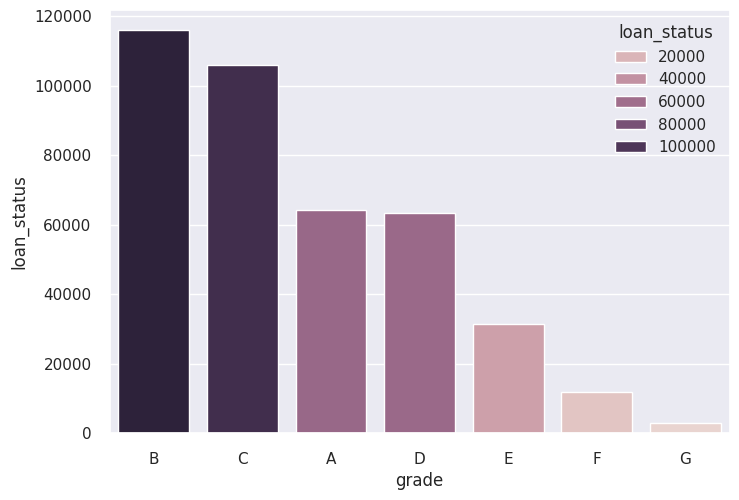

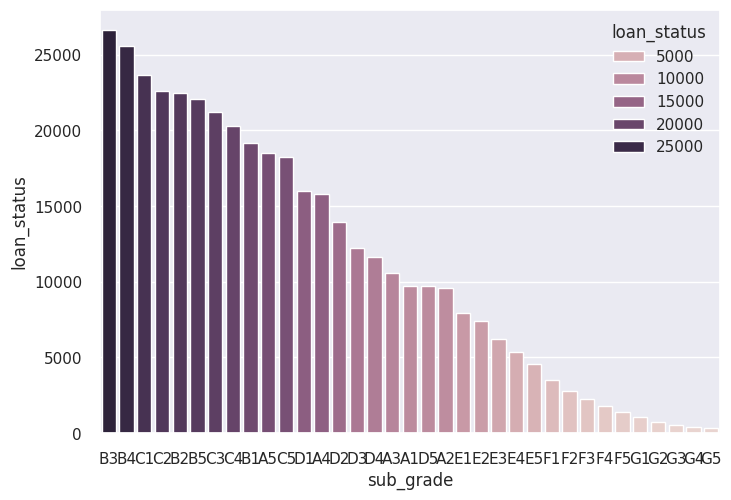

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a53b463c360> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a53b47bd8a0> (for post_execute):


KeyboardInterrupt: 

In [19]:
for col in df.select_dtypes(include = "object"):
  sns.barplot(df.groupby([col] , as_index=False).agg({"loan_status":"count"}).sort_values(by = "loan_status" , ascending = False ),
              hue="loan_status",
              x = col,
              y = "loan_status")
  plt.xticks(rotation = 0)
  plt.show()


In [105]:
dtypes_dict = {**categorical_dtypes , ** numerical_dtypes}

In [106]:
dtypes_dict

{'term': 'category',
 'grade': 'category',
 'sub_grade': 'category',
 'emp_length': 'category',
 'home_ownership': 'category',
 'verification_status': 'category',
 'issue_d': 'category',
 'loan_status': 'category',
 'purpose': 'category',
 'initial_list_status': 'category',
 'application_type': 'category',
 'loan_amnt': 'float32',
 'int_rate': 'float16',
 'installment': 'float32',
 'annual_inc': 'float32',
 'dti': 'float32',
 'open_acc': 'int8',
 'pub_rec': 'int8',
 'revol_bal': 'int16',
 'revol_util': 'float16',
 'total_acc': 'int8',
 'mort_acc': 'Int8',
 'pub_rec_bankruptcies': 'Int8'}

In [107]:
df = df.astype(dtypes_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float32 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float16 
 3   installment           396030 non-null  float32 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  object  
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float32 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394274 non-nul

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

In [ ]:
# sns.pairplot(df.select_dtypes(include="number"),
#              corner = True,
#              diag_kind= "kde");

In [108]:
pd.Series(df.isna().sum() , name="nan_values" , dtype = "int64").sort_values(ascending=False)[:6]

,nan_values
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276


In [109]:
nan_columns = pd.Series(df.isna().sum() , name="nan_values" , dtype = "int64").sort_values(ascending=False)[:6].index.tolist()
nan_columns

['mort_acc',
 'emp_title',
 'emp_length',
 'title',
 'pub_rec_bankruptcies',
 'revol_util']

In [ ]:
# for col in nan_columns:
#   sns.countplot(df , x = col , label = "{}".format(col));

In [110]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [111]:
categorical_dtypes

{'term': 'category',
 'grade': 'category',
 'sub_grade': 'category',
 'emp_length': 'category',
 'home_ownership': 'category',
 'verification_status': 'category',
 'issue_d': 'category',
 'loan_status': 'category',
 'purpose': 'category',
 'initial_list_status': 'category',
 'application_type': 'category'}

In [112]:
numerical_dtypes

{'loan_amnt': 'float32',
 'int_rate': 'float16',
 'installment': 'float32',
 'annual_inc': 'float32',
 'dti': 'float32',
 'open_acc': 'int8',
 'pub_rec': 'int8',
 'revol_bal': 'int16',
 'revol_util': 'float16',
 'total_acc': 'int8',
 'mort_acc': 'Int8',
 'pub_rec_bankruptcies': 'Int8'}

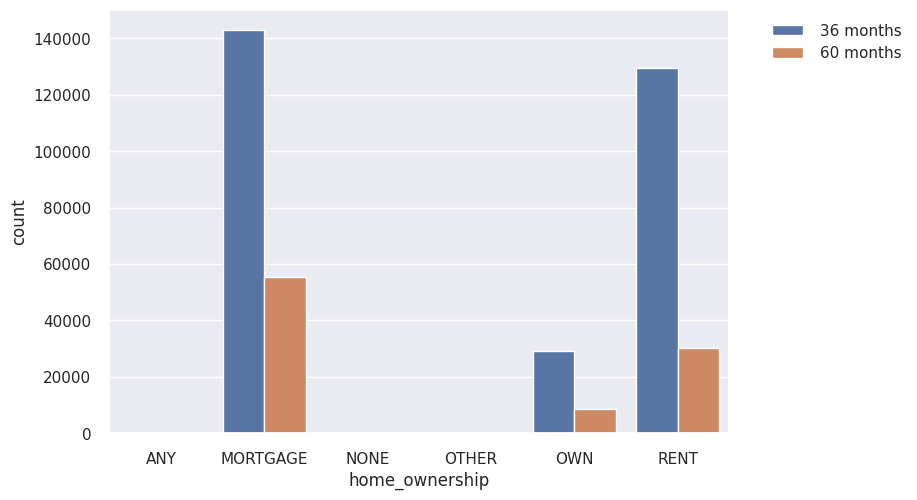

In [113]:
sns.countplot(df , x ="home_ownership" , hue = "term")
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

/tmp/ipython-input-1387096747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df , x="loan_status",order=["Fully Paid", "Charged Off"] , palette = ["blue","orange"])


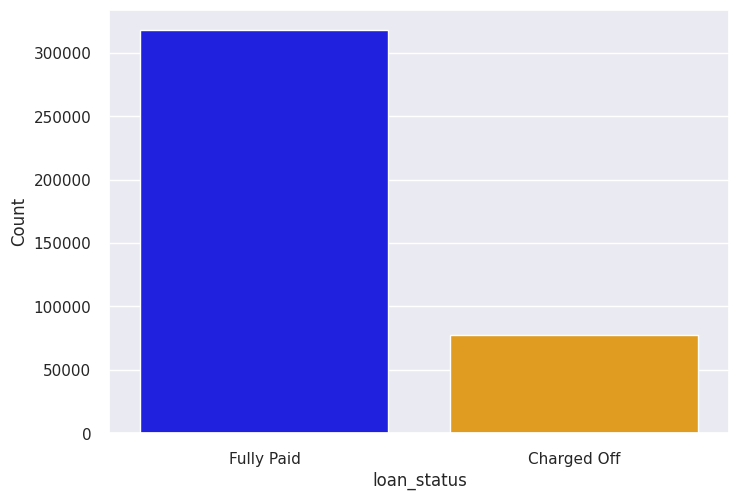

In [114]:
# CODE HERE
sns.countplot(df , x="loan_status",order=["Fully Paid", "Charged Off"] , palette = ["blue","orange"])
plt.ylabel("Count")
#yticks1 = [x for x in plt.yticks[0].tolist()]
#plt.yticks(yticks1)
plt.show()

**TASK: Create a histogram of the loan_amnt column.**

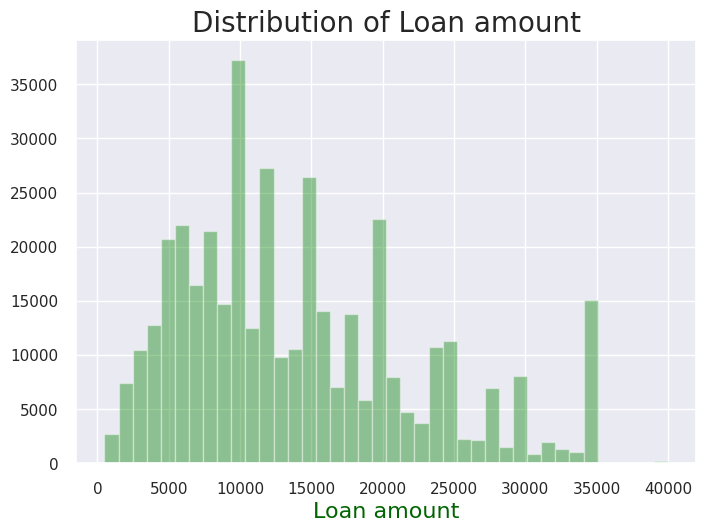

In [115]:
# CODE HERE

fig,ax = plt.subplots()

ax.hist(df["loan_amnt"], bins=40 , alpha = 0.4 , density=False , cumulative=False , color = "green")
ax.set_xlabel("Loan amount" , fontsize = 16, c = "darkgreen")
ax.set_title("Distribution of Loan amount" , fontsize = 20)
plt.show()

In [116]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# for col in df.select_dtypes(include = "object"):
#   sns.barplot(df.groupby(col , as_index=False).agg({"loan_status":"count"}).sort_values(by = "loan_status", ascending = False),
#               x = col,
#               y = "loan_status")

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [117]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168912,0.953929,0.336887,0.016636,0.198556,-0.077779,0.031168,0.099911,0.223429,0.222315,-0.106539
int_rate,0.168912,1.000000,0.162750,-0.056772,0.079035,0.011647,0.060988,0.012476,0.293669,-0.036290,-0.082584,0.057455
installment,0.953929,0.162750,1.000000,0.330381,0.015786,0.188973,-0.067892,0.032043,0.123915,0.202025,0.193694,-0.098628
annual_inc,0.336887,-0.056772,0.330381,1.000000,-0.081685,0.136150,-0.013720,-0.041605,0.027872,0.192686,0.236320,-0.050162
dti,0.016636,0.079035,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.022887,0.088376,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011647,0.188973,0.136150,0.136181,1.000000,-0.018392,0.044652,-0.131419,0.679246,0.109205,-0.027732
pub_rec,-0.077779,0.060988,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.036557,-0.075911,0.019791,0.011552,0.699408
revol_bal,0.031168,0.012476,0.032043,-0.041605,0.022887,0.044652,-0.036557,1.000000,0.112762,0.017918,-0.034404,-0.038494
revol_util,0.099911,0.293669,0.123915,0.027872,0.088376,-0.131419,-0.075911,0.112762,1.000000,-0.104160,0.007513,-0.086752
total_acc,0.223429,-0.036290,0.202025,0.192686,0.102128,0.679246,0.019791,0.017918,-0.104160,1.000000,0.381011,0.042100


In [118]:
df.corr(numeric_only=True).sort_values(by = "loan_amnt" ,
                                       ascending = False)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168912,0.953929,0.336887,0.016636,0.198556,-0.077779,0.031168,0.099911,0.223429,0.222315,-0.106539
installment,0.953929,0.162750,1.000000,0.330381,0.015786,0.188973,-0.067892,0.032043,0.123915,0.202025,0.193694,-0.098628
annual_inc,0.336887,-0.056772,0.330381,1.000000,-0.081685,0.136150,-0.013720,-0.041605,0.027872,0.192686,0.236320,-0.050162
total_acc,0.223429,-0.036290,0.202025,0.192686,0.102128,0.679246,0.019791,0.017918,-0.104160,1.000000,0.381011,0.042100
mort_acc,0.222315,-0.082584,0.193694,0.236320,-0.025439,0.109205,0.011552,-0.034404,0.007513,0.381011,1.000000,0.027239
open_acc,0.198556,0.011647,0.188973,0.136150,0.136181,1.000000,-0.018392,0.044652,-0.131419,0.679246,0.109205,-0.027732
int_rate,0.168912,1.000000,0.162750,-0.056772,0.079035,0.011647,0.060988,0.012476,0.293669,-0.036290,-0.082584,0.057455
revol_util,0.099911,0.293669,0.123915,0.027872,0.088376,-0.131419,-0.075911,0.112762,1.000000,-0.104160,0.007513,-0.086752
revol_bal,0.031168,0.012476,0.032043,-0.041605,0.022887,0.044652,-0.036557,1.000000,0.112762,0.017918,-0.034404,-0.038494
dti,0.016636,0.079035,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.022887,0.088376,0.102128,-0.025439,-0.014558


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

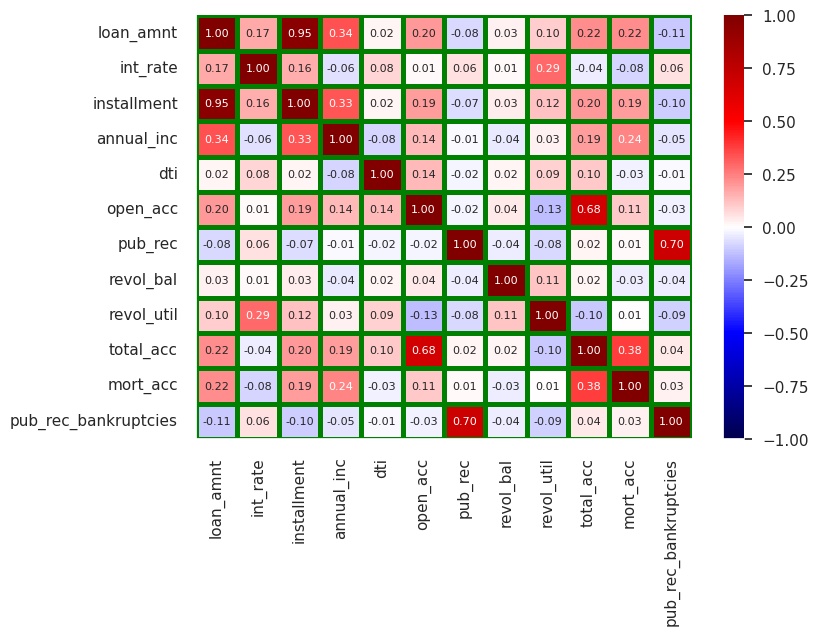

In [119]:
# CODE HERE
sns.heatmap(df.corr(numeric_only=True) ,
            vmin = -1 ,
            vmax = +1 ,
            cmap = "seismic" ,
            linecolor= "green",
            linewidths=2.5,
            fmt = "0.2f",
            annot_kws={"size":8},
            annot = True,
            )
sns.despine()

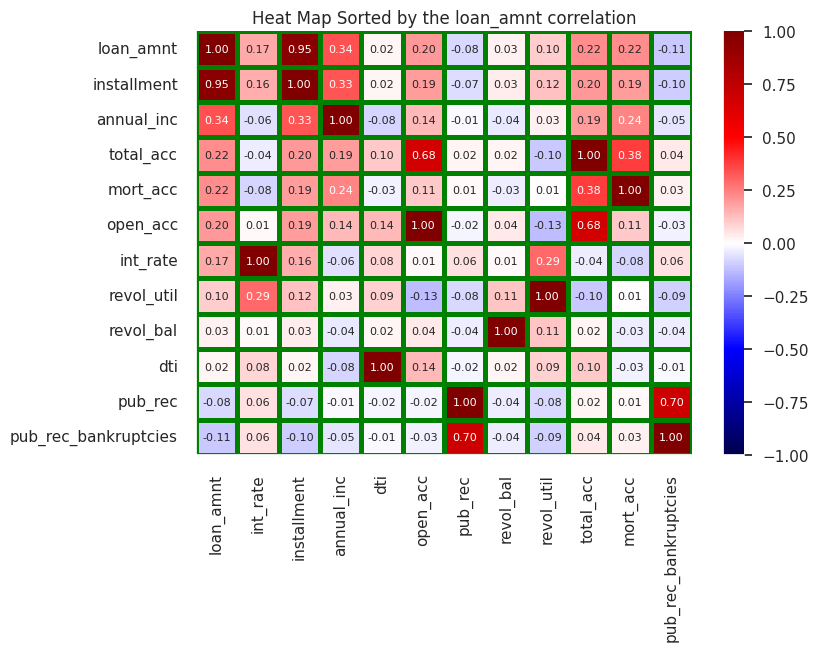

In [120]:
# CODE HERE
plt.title("Heat Map Sorted by the loan_amnt correlation")
sns.heatmap(df.corr(numeric_only=True).sort_values(by = "loan_amnt" , ascending = False) ,
            vmin = -1 ,
            vmax = +1 ,
            cmap = "seismic" ,
            linecolor= "green",
            linewidths=2.5,
            fmt = "0.2f",
            annot_kws={"size":8},
            annot = True,
            )
sns.despine()

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [121]:
# CODE HERE
df["installment"].describe().T

,installment
count,396030.000000
mean,431.849640
std,250.710510
min,16.080000
25%,250.330002
50%,375.429993
75%,567.299988
max,1533.810059


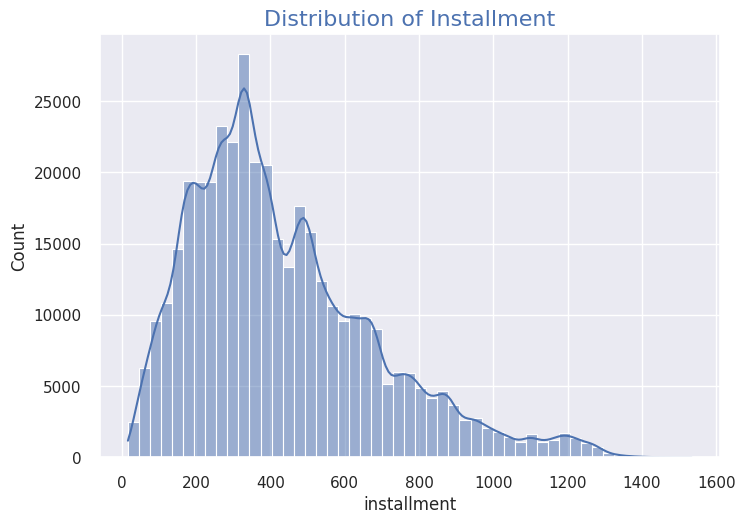

In [122]:
sns.histplot(df , x = "installment" , kde = True , binwidth=30 , discrete=False)
plt.title("Distribution of Installment" , fontsize = 16 , color = "b")

plt.show()

In [ ]:
# fig , ax = plt.subplots(2,2)

# ax[0,0].hist(df["installment"] , color = "blue" , bins = 10)
# ax[0,0].set_title("Distribution of installment" , fontsize = 16 , color = "blue")
# ax[0,0].set_xlabel("installment" , fontsize = 12 , color = "blue")
# # ax[0,0]
# # ax[0,0]
# # ax[0,0]

# ax[0,1].hist(df["loan_amnt"] , color = "green" , bins = 20)
# ax[0,1].set_title("Distribution of loan_amount" , fontsize = 16 , color = "green")
# ax[0,1].set_xlabel("Loan_amount" , fontsize = 12 , color = "green")
# # ax[0,1]
# # ax[0,1]
# # ax[0,1]

# ax[1,0].scatter(df["loan_amnt"] , df["installment"] , marker = "o" ,alpha = 0.3 , cmap= "viridis")
# ax[1,0].set_title("Scatter plot between installment & loan_amnt" , fontsize = 16)

# plt.show()

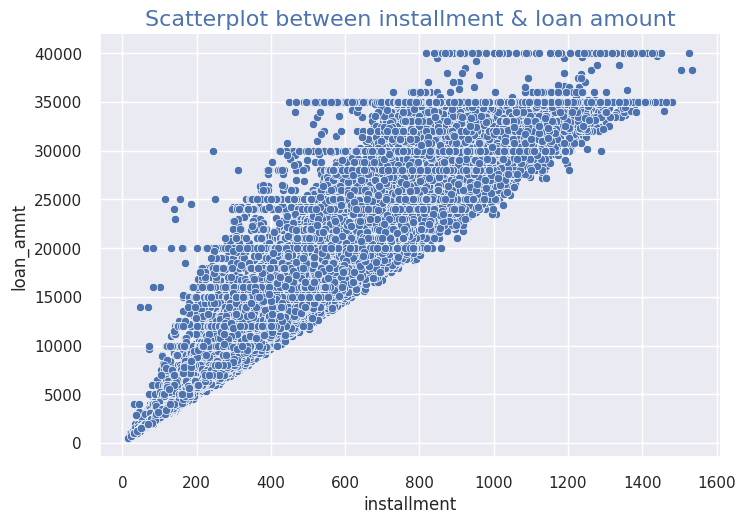

In [30]:
sns.scatterplot(df , x = "installment" , y = "loan_amnt" )
plt.title("Scatterplot between installment & loan amount" , fontsize = 16 , c = "b")
sns.despine()

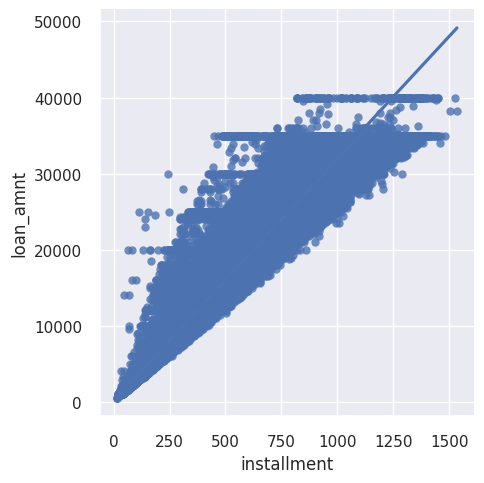

In [31]:
sns.lmplot(df , x = "installment" , y = "loan_amnt" , palette= "viridis")
sns.despine()

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

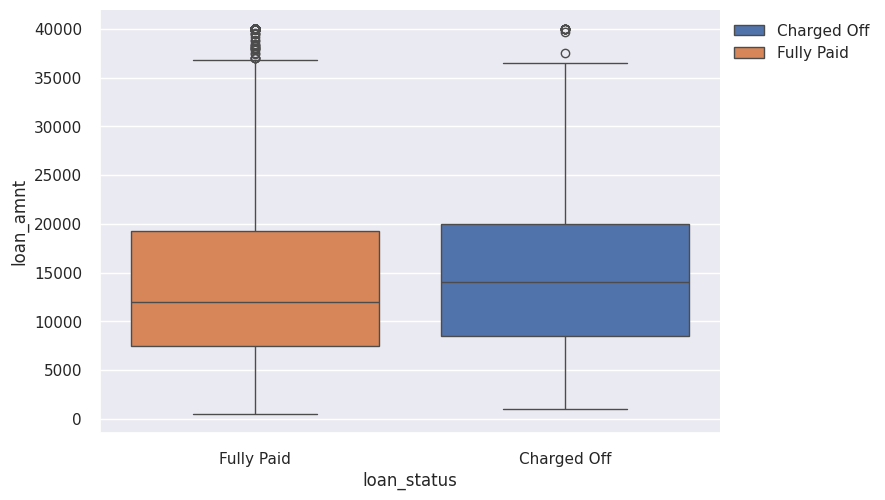

In [123]:
# CODE HERE
sns.boxplot(df ,
            x = "loan_status" ,
            y = "loan_amnt" ,
            order = ["Fully Paid" , "Charged Off"] ,
            hue = "loan_status",
            legend = True,
            #palette = ["blue", "orange"],
            saturation=0.9
            )
plt.legend(bbox_to_anchor = (1,1))
sns.despine()

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [124]:
# CODE HERE
df[["loan_amnt", "loan_status"]]

,loan_amnt,loan_status
0,10000.0,Fully Paid
1,8000.0,Fully Paid
2,15600.0,Fully Paid
3,7200.0,Fully Paid
4,24375.0,Charged Off
...,...,...
396025,10000.0,Fully Paid
396026,21000.0,Fully Paid
396027,5000.0,Fully Paid
396028,21000.0,Fully Paid


In [125]:
df.groupby("loan_status")["loan_amnt"].describe()

/tmp/ipython-input-4283508569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("loan_status")["loan_amnt"].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.301758,8504.981445,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.877930,8301.580078,500.0,7500.0,12000.0,19225.0,40000.0


In [126]:
# pass observed = True
df.groupby("loan_status" , observed=True)["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.301758,8504.981445,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.877930,8301.580078,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [127]:
# CODE HERE
df["grade"].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [128]:
df["grade"].value_counts().index.tolist()

['B', 'C', 'A', 'D', 'E', 'F', 'G']

In [129]:
df["sub_grade"].value_counts()

,count
sub_grade,
B3,26655
B4,25601
C1,23662
C2,22580
B2,22495
B5,22085
C3,21221
C4,20280
B1,19182


In [130]:
sorted(df["sub_grade"].value_counts().index.tolist())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

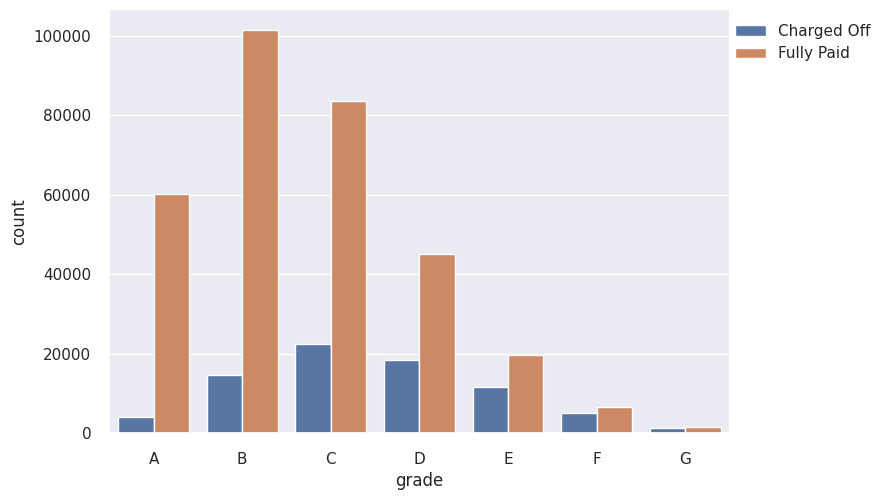

In [131]:
# CODE HERE
sns.countplot(df , x = "grade" , hue = "loan_status")
plt.legend(bbox_to_anchor = (1.25,1))
sns.despine()

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

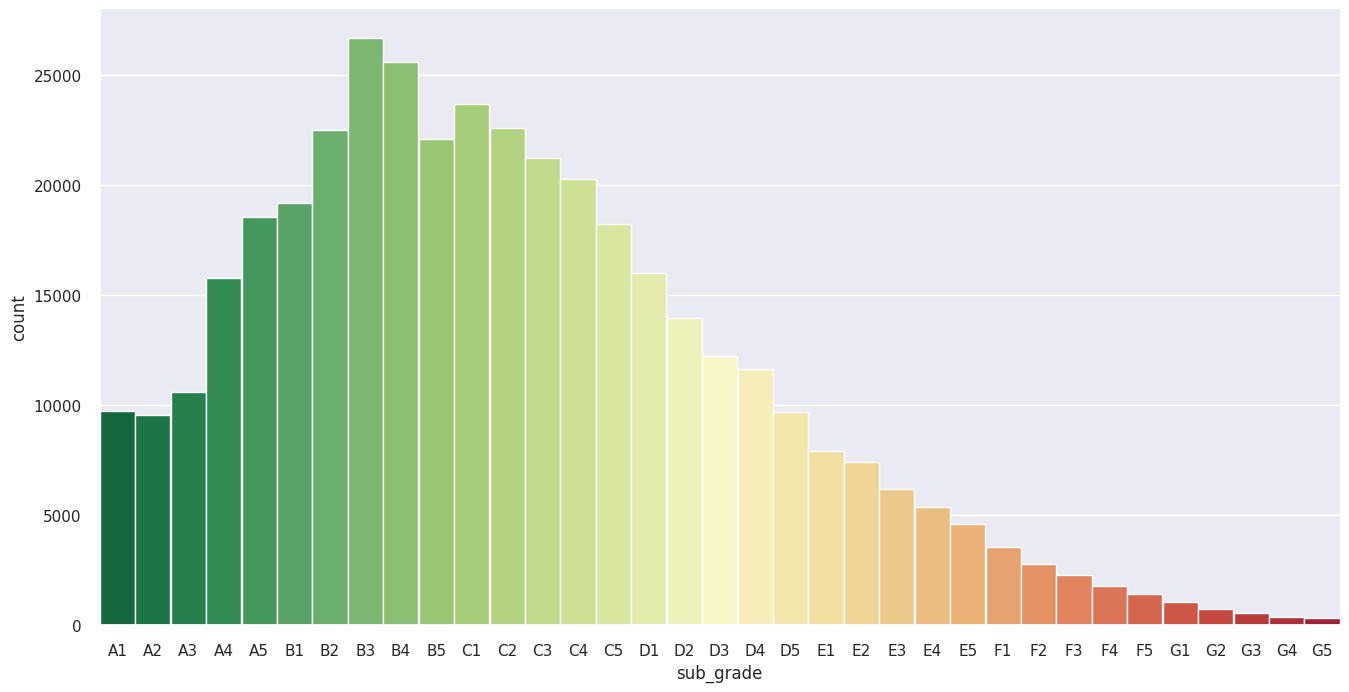

In [132]:
#CODE HERE
plt.figure(figsize=(16,8))
sns.countplot(df , x = "sub_grade" , palette="RdYlGn_r" ,hue = "sub_grade", legend=False, dodge=False , width = 0.99)
plt.xticks(rotation = 0)
sns.despine()

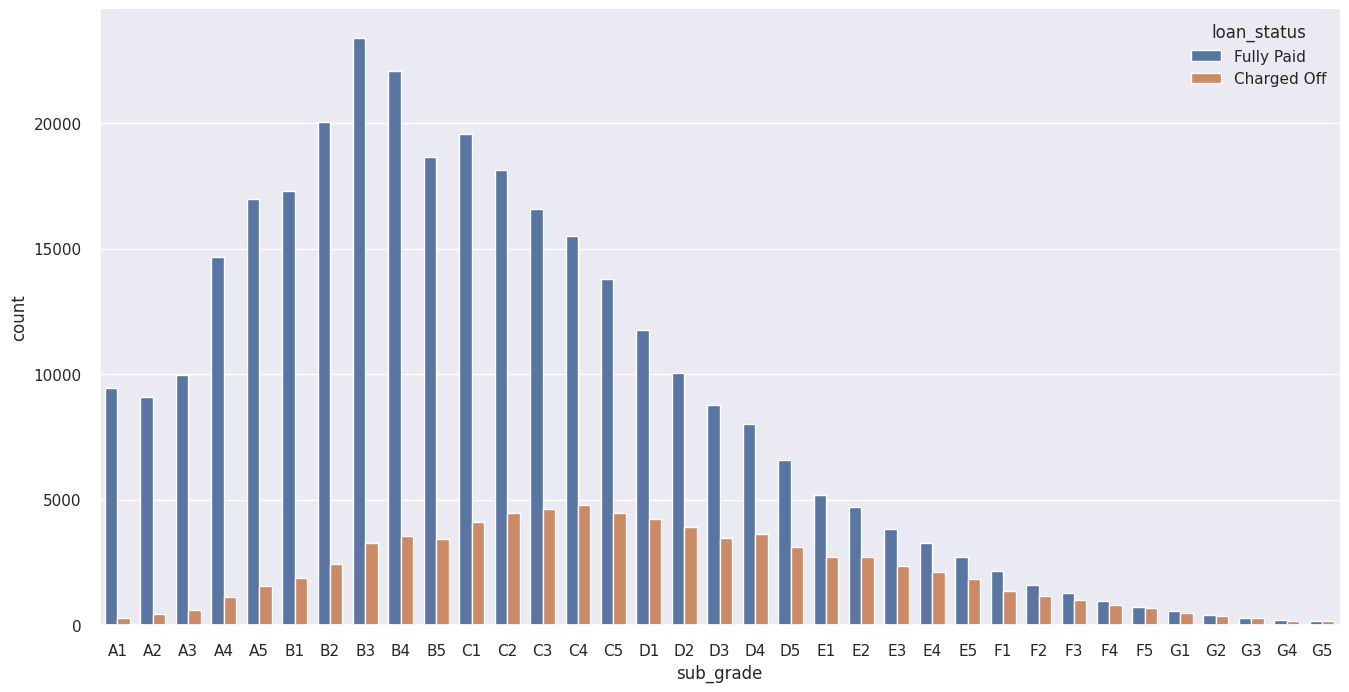

In [133]:
# CODE HERE
plt.figure(figsize=(16,8))

sns.countplot(df,
              x = "sub_grade",
              hue = "loan_status",
              hue_order=["Fully Paid","Charged Off"],
              legend=True,
              width = 0.7
              )

sns.despine()

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [134]:
mask_G = df.sub_grade.str.contains("G")
mask_F = df.sub_grade.str.contains("F")
df_FG = df.sub_grade.loc[mask_F | mask_G].value_counts().to_frame()
df_FG.columns


Index(['count'], dtype='object')

In [135]:
df_FG[df_FG['count'] != 0]

,count
sub_grade,
F1,3536
F2,2766
F3,2286
F4,1787
F5,1397
G1,1058
G2,754
G3,552
G4,374


In [136]:
FG_list = df_FG[df_FG['count'] != 0].index.tolist()
FG_list

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

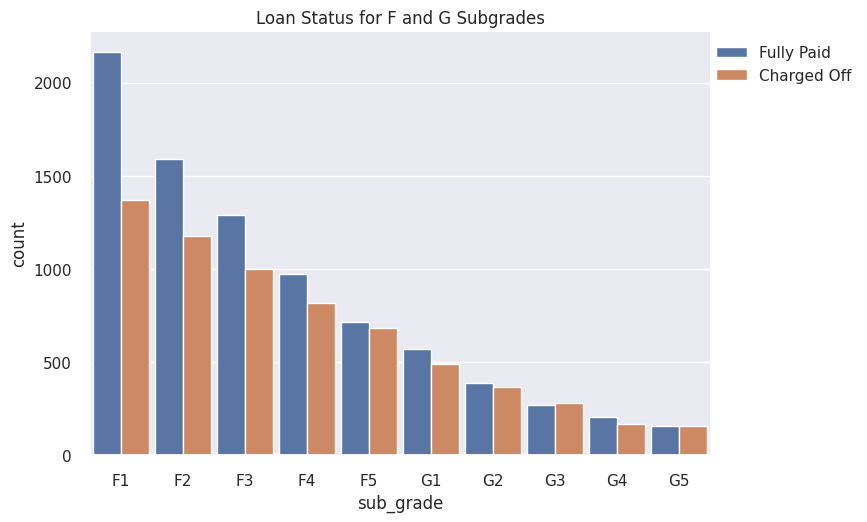

In [137]:
# CODE HERE
sns.countplot(df[df["sub_grade"].isin(FG_list)],
              x = "sub_grade",
              hue = "loan_status",
              order = FG_list,
              hue_order = ["Fully Paid" , "Charged Off"],
              width = 0.9
              )
plt.title('Loan Status for F and G Subgrades')
plt.legend(bbox_to_anchor = (1.25,1))
sns.despine()

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [138]:
# CODE HERE
df["loan_repaid"] = np.where(df["loan_status"] == "Fully Paid" , 1 , 0)
df[["loan_repaid" , "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [139]:
df.corr(numeric_only=True).iloc[:,-1]

,loan_repaid
loan_amnt,-0.059836
int_rate,-0.247750
installment,-0.041082
annual_inc,0.053432
dti,-0.062413
open_acc,-0.028012
pub_rec,-0.019933
revol_bal,-0.008563
revol_util,-0.082373
total_acc,0.017918


In [140]:
#CODE HERE
loan_repaid_df = df.corr(numeric_only=True).iloc[:-1, -1].sort_values(ascending=False).to_frame()
loan_repaid_df

,loan_repaid
mort_acc,0.073111
annual_inc,0.053432
total_acc,0.017918
revol_bal,-0.008563
pub_rec_bankruptcies,-0.009383
pub_rec,-0.019933
open_acc,-0.028012
installment,-0.041082
loan_amnt,-0.059836
dti,-0.062413


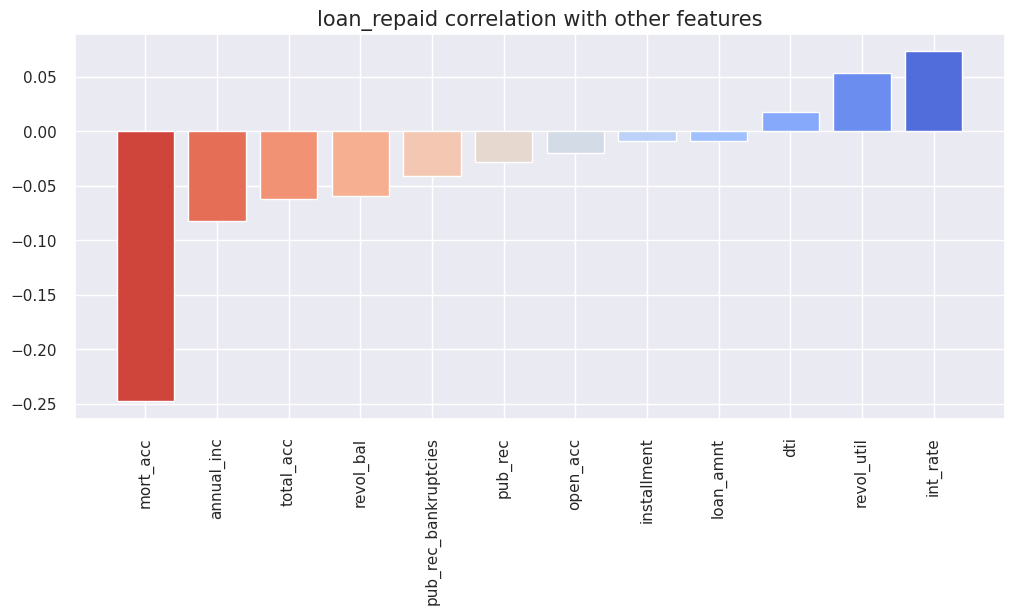

In [141]:
plt.figure(figsize=(12,5))
plt.bar(loan_repaid_df.index ,
        loan_repaid_df.loan_repaid[::-1],
        color = sns.color_palette("coolwarm_r", len(loan_repaid_df))
        )
plt.title("loan_repaid correlation with other features" ,
          fontsize = 15)
plt.xticks(rotation = 90)

plt.show()

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [142]:
nan_columns = []
for col in df.columns:
  if df[col].isna().sum() != 0:
    nan_columns.append(col)

print(nan_columns)


['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']


In [143]:
df["emp_title"].value_counts(dropna=False)

,count
emp_title,
NaN,22927
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
...,...
"SVP, Technology",1
sikorsky,1
Postman,1


In [144]:
df['emp_length'].value_counts(dropna = False)

,count
emp_length,
10+ years,126041
2 years,35827
< 1 year,31725
3 years,31665
5 years,26495
1 year,25882
4 years,23952
6 years,20841
7 years,20819


In [145]:
df["title"].value_counts(dropna = False)

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
...,...
gotta move,1
creditcardrefi,1
Debt/Home,1


In [146]:
df.loc[df["title"].isna() == True , "title"]

,title
555,NaN
774,NaN
883,NaN
1016,NaN
1204,NaN
...,...
395261,NaN
395306,NaN
395355,NaN
395633,NaN


In [147]:
df["emp_title"].isnull().any()

np.True_

In [148]:
df['pub_rec_bankruptcies'].value_counts(dropna=False)

,count
pub_rec_bankruptcies,
0,350380
1,42790
2,1847
<NA>,535
3,351
4,82
5,32
6,7
7,4


In [149]:
df["mort_acc"].value_counts(dropna = False)

,count
mort_acc,
0,139777
1,60416
2,49948
3,38049
<NA>,37795
4,27887
5,18194
6,11069
7,6052


In [150]:
df["revol_util"].value_counts(dropna=False)

,count
revol_util,
0.00000,2213
53.00000,752
60.00000,739
61.00000,734
55.00000,730
...,...
94.43750,1
118.87500,1
38.78125,1


In [151]:
df["emp_title"].value_counts(dropna = False)

,count
emp_title,
NaN,22927
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
...,...
"SVP, Technology",1
sikorsky,1
Postman,1


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [152]:
# CODE HERE
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [153]:
# CODE HERE
index = df.columns
values = [df[col].isna().sum() for col in index]
nan_values = pd.Series(values , index , name = "#_missed_values").sort_values(ascending= False)
nan_values

,#_missed_values
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
sub_grade,0
grade,0
installment,0
int_rate,0


**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [154]:
# CODE HERE
nan_values.div(len(df))*100

,#_missed_values
mort_acc,9.543469
emp_title,5.789208
emp_length,4.621115
title,0.443401
pub_rec_bankruptcies,0.135091
revol_util,0.069692
sub_grade,0.000000
grade,0.000000
installment,0.000000
int_rate,0.000000


**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [65]:
# CODE HERE


In [159]:
feat_info("emp_length")

**TASK: How many unique employment job titles are there?**

In [156]:
# CODE HERE
df["emp_title"].value_counts(dropna = False)

,count
emp_title,
NaN,22927
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
...,...
"SVP, Technology",1
sikorsky,1
Postman,1


In [157]:
df["emp_title"].value_counts(dropna = False).shape[0]

173106

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [158]:
# CODE HERE
df.drop(labels = "emp_title" , axis = "columns" , inplace = True)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [ ]:
df.emp_length.value_counts().sort_values(ascending=False)

,count
emp_length,
10+ years,126041
2 years,35827
< 1 year,31725
3 years,31665
5 years,26495
1 year,25882
4 years,23952
6 years,20841
7 years,20819


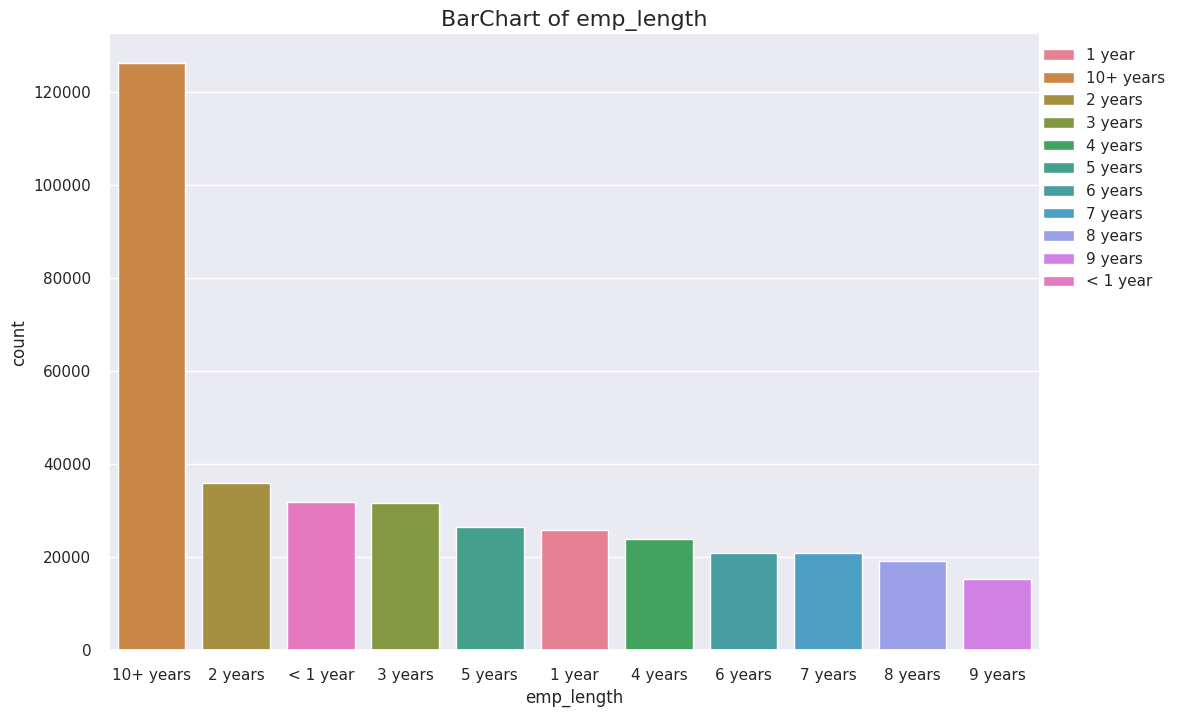

In [160]:
# CODE HERE
plt.figure(figsize=(12,8))
plt.title("BarChart of emp_length" , fontsize = 16)
sns.countplot(data = df ,
              x = "emp_length" ,
              order = df.emp_length.value_counts().sort_values(ascending=False).index,
              hue = "emp_length",
              legend = True
              )
plt.legend(bbox_to_anchor = (1.15,1))
sns.despine()

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

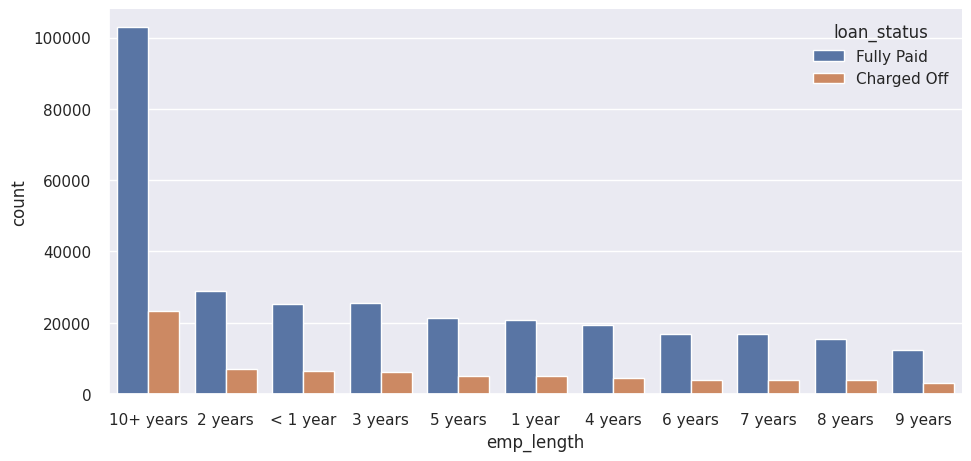

In [161]:
# CODE HERE
plt.figure(figsize = (11,5))
sns.countplot(df,
              x = "emp_length",
              hue = "loan_status",
              hue_order = ["Fully Paid" , "Charged Off"],
              order = df.emp_length.value_counts().sort_values(ascending=False).index
              )


sns.despine()

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [162]:
# CODE HERE
df_emp_length_loan_status = df.groupby(["emp_length","loan_status"]).agg({"loan_status":"count"}).unstack()
df_emp_length_loan_status

/tmp/ipython-input-265060402.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_emp_length_loan_status = df.groupby(["emp_length","loan_status"]).agg({"loan_status":"count"}).unstack()


loan_status           
loan_status Charged Off Fully Paid
emp_length                        
1 year             5154      20728
10+ years         23215     102826
2 years            6924      28903
3 years            6182      25483
4 years            4608      19344
5 years            5092      21403
6 years            3943      16898
7 years            4055      16764
8 years            3829      15339
9 years            3070      12244
< 1 year           6563      25162

In [163]:
df_emp_length_loan_status.columns = ["Charged Off" , "Fully Paid"]
df_emp_length_loan_status

,Charged Off,Fully Paid
emp_length,,
1 year,5154,20728
10+ years,23215,102826
2 years,6924,28903
3 years,6182,25483
4 years,4608,19344
5 years,5092,21403
6 years,3943,16898
7 years,4055,16764
8 years,3829,15339


In [164]:
df_emp_length_loan_status["loan_status_ratio"] = df_emp_length_loan_status["Charged Off"]/df_emp_length_loan_status["Fully Paid"]
df_emp_length_loan_status

,Charged Off,Fully Paid,loan_status_ratio
emp_length,,,
1 year,5154,20728,0.248649
10+ years,23215,102826,0.225770
2 years,6924,28903,0.239560
3 years,6182,25483,0.242593
4 years,4608,19344,0.238213
5 years,5092,21403,0.237911
6 years,3943,16898,0.233341
7 years,4055,16764,0.241887
8 years,3829,15339,0.249625


In [165]:
df_emp_length_loan_status.index

CategoricalIndex(['1 year', '10+ years', '2 years', '3 years', '4 years',
                  '5 years', '6 years', '7 years', '8 years', '9 years',
                  '< 1 year'],
                 categories=['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years', '9 years', '< 1 year'], ordered=False, dtype='category', name='emp_length')

/tmp/ipython-input-1669491376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_emp_length_loan_status ,


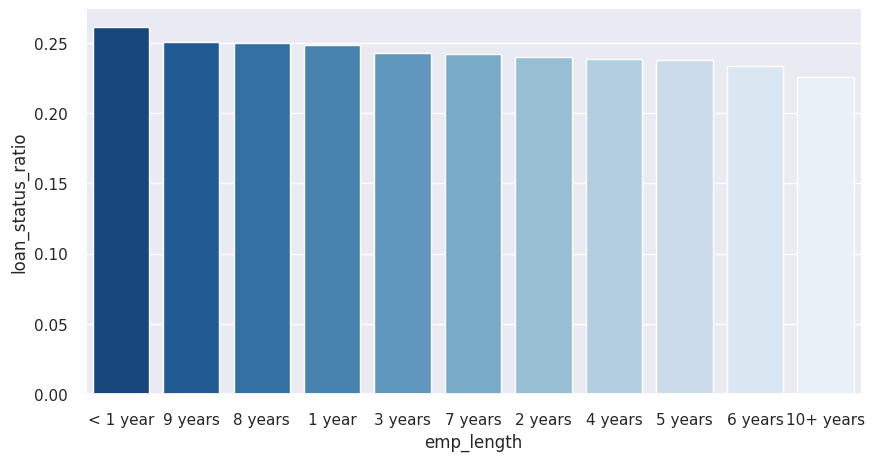

In [166]:
plt.figure(figsize = (10,5))

sns.barplot(data = df_emp_length_loan_status ,
            x = df_emp_length_loan_status.index ,
            y = "loan_status_ratio",
            palette = "Blues_r",
            order = df_emp_length_loan_status["loan_status_ratio"].sort_values(ascending=False).index )

sns.despine()


**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [167]:
# CODE HERE
df.drop(columns = "emp_length" , inplace = True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [168]:
index = df.columns
values = [df[col].isna().sum() for col in index]
nan_values = pd.Series(values , index , name = "#_missed_values").sort_values(ascending= False)
nan_values

,#_missed_values
mort_acc,37795
title,1756
pub_rec_bankruptcies,535
revol_util,276
grade,0
sub_grade,0
int_rate,0
installment,0
loan_amnt,0
term,0


**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [169]:
df.shape

(396030, 26)

In [170]:
# CODE HERE
df[["title" , "purpose"]]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [171]:
# CODE HERE
df.drop(columns = ["title"] , inplace = True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [172]:
# CODE HERE
df["mort_acc"].describe()

,mort_acc
count,358235.0
mean,1.813991
std,2.14793
min,0.0
25%,0.0
50%,1.0
75%,3.0
max,34.0


**TASK: Create a value_counts of the mort_acc column.**

In [173]:
# CODE HERE
df["mort_acc"].value_counts(dropna = False)

,count
mort_acc,
0,139777
1,60416
2,49948
3,38049
<NA>,37795
4,27887
5,18194
6,11069
7,6052


**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [174]:
df.corr(numeric_only=True).loc[: , "mort_acc"].sort_values(ascending = False)

,mort_acc
mort_acc,1.000000
total_acc,0.381011
annual_inc,0.236320
loan_amnt,0.222315
installment,0.193694
open_acc,0.109205
loan_repaid,0.073111
pub_rec_bankruptcies,0.027239
pub_rec,0.011552
revol_util,0.007513


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [175]:
df.groupby(["total_acc"])["total_acc"].count()

,total_acc
total_acc,
-127,1
-121,1
-106,1
-105,1
2,18
...,...
115,1
116,2
117,1


In [176]:
df = df[~df["total_acc"].isin([-127,-121,-105,-106])]

In [177]:
df["total_acc"].value_counts(dropna=False).sort_index()

,count
total_acc,
2,18
3,327
4,1238
5,2028
6,2923
...,...
115,1
116,2
117,1


In [178]:
df["mort_acc"].isna()

,mort_acc
0,False
1,False
2,False
3,False
4,False
...,...
396025,False
396026,False
396027,False
396028,False


In [179]:
# First, pre-calculate the mean 'mort_acc' for each 'total_acc' value
mort_acc_means = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort_acc(row):
  # 'row' is a pandas Series representing a single row of the DataFrame

  if pd.isna(row["mort_acc"]):
    # If 'mort_acc' is NaN, fill it with the pre-calculated mean corresponding to this row's 'total_acc'
    # Use .get() to handle cases where a 'total_acc' might not have a corresponding mean in the calculated Series
    return mort_acc_means.get(row["total_acc"], row["mort_acc"])

  else:
    return row["mort_acc"]

In [180]:
df['mort_acc'] = df.apply(fill_mort_acc, axis=1)

In [181]:
df["mort_acc"].value_counts(dropna = False)

,count
mort_acc,
0.000000,139778
1.000000,60415
2.000000,49948
3.000000,38048
4.000000,27887
...,...
28.000000,1
3.176471,1
3.285714,1


**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe)

In [182]:
df.isna().sum().sort_values(ascending=False)

,0
pub_rec_bankruptcies,535
revol_util,276
int_rate,0
term,0
grade,0
sub_grade,0
home_ownership,0
installment,0
loan_amnt,0
verification_status,0


**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [183]:
df.dropna(subset=["revol_util" , "pub_rec_bankruptcies"] , inplace = True)

In [184]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [185]:
# CODE HERE
df.select_dtypes(exclude="number").columns.to_list()

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [186]:
df["term"] = df["term"].str[:3].astype("int")
df["term"]

,term
0,36
1,36
2,36
3,36
4,60
...,...
396025,60
396026,36
396027,36
396028,60


In [187]:
print(df["term"].value_counts())

term
36    301245
60     93970
Name: count, dtype: int64


### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [188]:
# CODE HERE
df.drop(["grade"] , axis =1 , inplace = True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [189]:
# CODE HERE
dummies = pd.get_dummies(df["sub_grade"] , drop_first=True , dtype = "int")
df = pd.concat([df.drop(["sub_grade"] , axis = 1) , dummies] , axis = 1)
df

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.437500,329.480011,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.992188,265.679993,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.492188,506.970001,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.488281,220.649994,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.265625,609.330017,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.992188,217.380005,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.289062,700.419983,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.992188,161.320007,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.312500,503.019989,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [191]:
# CODE HERE
dummies_cat_columns = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']] , drop_first=True , dtype = "int")
dummies_cat_columns

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [192]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'] , axis = 1),
                dummies_cat_columns] ,
                axis = 1)
df

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.437500,329.480011,RENT,117000.0,Jan-2015,Fully Paid,26.240000,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.992188,265.679993,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.049999,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.492188,506.970001,RENT,43057.0,Jan-2015,Fully Paid,12.790000,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.488281,220.649994,RENT,54000.0,Nov-2014,Fully Paid,2.600000,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.265625,609.330017,MORTGAGE,55000.0,Apr-2013,Charged Off,33.950001,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.992188,217.380005,RENT,40000.0,Oct-2015,Fully Paid,15.630000,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.289062,700.419983,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.450001,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.992188,161.320007,RENT,56500.0,Oct-2013,Fully Paid,17.559999,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.312500,503.019989,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.880000,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


### *home_ownership*
**TASK:Review the value_counts for the home_ownership column.**

In [193]:
df["home_ownership"].value_counts()

,count
home_ownership,
MORTGAGE,198020
RENT,159394
OWN,37659
OTHER,110
NONE,29
ANY,3


**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [194]:
#CODE HERE
df["home_ownership"] = df["home_ownership"].replace(to_replace=["NONE" , "ANY"] , value=["OTHER" ,"OTHER"] )
#np.where(df["home_ownership"].isin(["NONE" , "ANY"]) , "OTHER" , df["home_ownership"])
df["home_ownership"].value_counts()

/tmp/ipython-input-2302492508.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["home_ownership"] = df["home_ownership"].replace(to_replace=["NONE" , "ANY"] , value=["OTHER" ,"OTHER"] )


,count
home_ownership,
MORTGAGE,198020
RENT,159394
OWN,37659
OTHER,142


In [195]:
dummies_home_ownership = pd.get_dummies(df["home_ownership"] , drop_first=True , dtype = "int")

In [196]:
df = pd.concat([df.drop(["home_ownership"] , axis = 1) , dummies_home_ownership] , axis = 1)
df

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.437500,329.480011,117000.0,Jan-2015,Fully Paid,26.240000,Jun-1990,16,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.992188,265.679993,65000.0,Jan-2015,Fully Paid,22.049999,Jul-2004,17,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.492188,506.970001,43057.0,Jan-2015,Fully Paid,12.790000,Aug-2007,13,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.488281,220.649994,54000.0,Nov-2014,Fully Paid,2.600000,Sep-2006,6,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.265625,609.330017,55000.0,Apr-2013,Charged Off,33.950001,Mar-1999,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.992188,217.380005,40000.0,Oct-2015,Fully Paid,15.630000,Nov-2004,6,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.289062,700.419983,110000.0,Feb-2015,Fully Paid,21.450001,Feb-2006,6,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.992188,161.320007,56500.0,Oct-2013,Fully Paid,17.559999,Mar-1997,15,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.312500,503.019989,64000.0,Aug-2012,Fully Paid,15.880000,Nov-1990,9,...,0,0,0,0,0,0,0,0,0,0


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [197]:
#CODE HERE
df["zip_code"] = df["address"].str[-5:]
df["zip_code"]

,zip_code
0,22690
1,05113
2,05113
3,00813
4,11650
...,...
396025,30723
396026,05113
396027,70466
396028,29597


**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [198]:
dummies_zipcode = pd.get_dummies(df["zip_code"] , drop_first=True , dtype = "int")

In [199]:
df = pd.concat([df.drop(["address"] , axis = 1) , dummies_zipcode] , axis = 1)
df

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,zip_code,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.437500,329.480011,117000.0,Jan-2015,Fully Paid,26.240000,Jun-1990,16,...,22690,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.992188,265.679993,65000.0,Jan-2015,Fully Paid,22.049999,Jul-2004,17,...,05113,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.492188,506.970001,43057.0,Jan-2015,Fully Paid,12.790000,Aug-2007,13,...,05113,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.488281,220.649994,54000.0,Nov-2014,Fully Paid,2.600000,Sep-2006,6,...,00813,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.265625,609.330017,55000.0,Apr-2013,Charged Off,33.950001,Mar-1999,13,...,11650,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.992188,217.380005,40000.0,Oct-2015,Fully Paid,15.630000,Nov-2004,6,...,30723,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.289062,700.419983,110000.0,Feb-2015,Fully Paid,21.450001,Feb-2006,6,...,05113,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.992188,161.320007,56500.0,Oct-2013,Fully Paid,17.559999,Mar-1997,15,...,70466,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.312500,503.019989,64000.0,Aug-2012,Fully Paid,15.880000,Nov-1990,9,...,29597,0,0,0,1,0,0,0,0,0


### issue_d

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [200]:
#CODE HERE
df.drop(["issue_d"] , axis = 1 , inplace= True)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [201]:
#CODE HERE
df.head()

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,zip_code,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.437500,329.480011,117000.0,Fully Paid,26.240000,Jun-1990,16,0,...,22690,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.992188,265.679993,65000.0,Fully Paid,22.049999,Jul-2004,17,0,...,05113,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.492188,506.970001,43057.0,Fully Paid,12.790000,Aug-2007,13,0,...,05113,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.488281,220.649994,54000.0,Fully Paid,2.600000,Sep-2006,6,0,...,00813,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.265625,609.330017,55000.0,Charged Off,33.950001,Mar-1999,13,0,...,11650,0,1,0,0,0,0,0,0,0


In [202]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"]).dt.strftime("%Y")

/tmp/ipython-input-808585163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"]).dt.strftime("%Y")


## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [203]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [204]:
# CODE HERE
df.drop(["loan_status"] , axis = 1 , inplace=True)


**TASK: Set X and y variables to the .values of the features and label.**

In [205]:
#CODE HERE
X = df.drop(["loan_repaid"] , axis = 1)
y = df["loan_repaid"]

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [ ]:
# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

In [206]:
X = df.drop(["loan_repaid"] , axis = 1)
y = df["loan_repaid"]

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [207]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [208]:
# CODE HERE
from sklearn.preprocessing import  MinMaxScaler

In [209]:
scaler = MinMaxScaler()

In [210]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [212]:
X_train.shape

(316172, 79)

In [213]:
Dropout.__init__

<function keras.src.layers.regularization.dropout.Dropout.__init__(self, rate, noise_shape=None, seed=None, **kwargs)>

In [214]:
Dense.__init__

<function keras.src.layers.core.dense.Dense.__init__(self, units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, lora_alpha=None, **kwargs)>

In [215]:
help(compile)

Help on built-in function compile in module builtins:

compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1, *, _feature_version=-1)
    Compile source into a code object that can be executed by exec() or eval().

    The source code may represent a Python module, statement or expression.
    The filename will be used for run-time error messages.
    The mode must be 'exec' to compile a module, 'single' to compile a
    single (interactive) statement, or 'eval' to compile an expression.
    The flags argument, if present, controls which future statements influence
    the compilation of the code.
    The dont_inherit argument, if true, stops the compilation inheriting
    the effects of any future statements in effect in the code calling
    compile; if absent or false these statements do influence the compilation,
    in addition to any features explicitly specified.



So We will consider the number of the neurons to be 79 in the first layer.

In [219]:
model = Sequential()

model.add(Dense(units=79 , activation="relu"))
model.add(Dropout(rate = 0.2))

model.add(Dense(units=39 , activation="relu"))
model.add(Dropout(rate = 0.2))

model.add(Dense(units=19 , activation="relu"))
model.add(Dropout(rate = 0.2))

model.add(Dense(units=1 , activation = "sigmoid"))

model.compile(loss="binary_crossentropy" , optimizer="adam")

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [220]:
model.fit(x = X_train ,
          y = y_train ,
          epochs=25 ,
          batch_size=256 ,
          validation_data=(X_test , y_test) ,
          verbose=1)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3491 - val_loss: 0.2622
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2666 - val_loss: 0.2610
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2643 - val_loss: 0.2602
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2622 - val_loss: 0.2600
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2622 - val_loss: 0.2595
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2599 - val_loss: 0.2596
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2603 - val_loss: 0.2593
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2601 - val_loss: 0.2599
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2587 - val_loss: 0.2591
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2585 - val_loss: 0.2593
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2600 - val_loss: 0.2597
Epoch 12/25
1236/1236 ━━━━━━━━

**TASK: OPTIONAL: Save your model.**

In [ ]:
# CODE HERE
model.save("LR_Model")

In [ ]:
# to load model:
from tensorflow.keras.models import load_model


# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [221]:
# CODE HERE
model.history.history

{'loss': [0.29626399278640747,
  0.26580724120140076,
  0.2633136212825775,
  0.26210013031959534,
  0.261305570602417,
  0.26107457280158997,
  0.2605622112751007,
  0.260151207447052,
  0.2597517669200897,
  0.2595077455043793,
  0.25911667943000793,
  0.25881922245025635,
  0.258802205324173,
  0.25870272517204285,
  0.25818756222724915,
  0.25817081332206726,
  0.2578762471675873,
  0.2577563226222992,
  0.25735095143318176,
  0.25708234310150146,
  0.257031112909317,
  0.25694742798805237,
  0.25672826170921326,
  0.2565220892429352,
  0.25659632682800293],
 'val_loss': [0.26215073466300964,
  0.26096290349960327,
  0.26016587018966675,
  0.25995588302612305,
  0.259507417678833,
  0.25963932275772095,
  0.2593420147895813,
  0.2599309980869293,
  0.2591307461261749,
  0.25934353470802307,
  0.2596936523914337,
  0.2594578266143799,
  0.2592017948627472,
  0.2593015432357788,
  0.25944915413856506,
  0.2594960927963257,
  0.2595881223678589,
  0.2594345211982727,
  0.2597712278366

In [222]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [223]:
losses = pd.DataFrame(model.history.history , columns=model.history.history.keys())
losses

,loss,val_loss
0,0.296264,0.262151
1,0.265807,0.260963
2,0.263314,0.260166
3,0.262100,0.259956
4,0.261306,0.259507
5,0.261075,0.259639
6,0.260562,0.259342
7,0.260151,0.259931
8,0.259752,0.259131
9,0.259508,0.259344


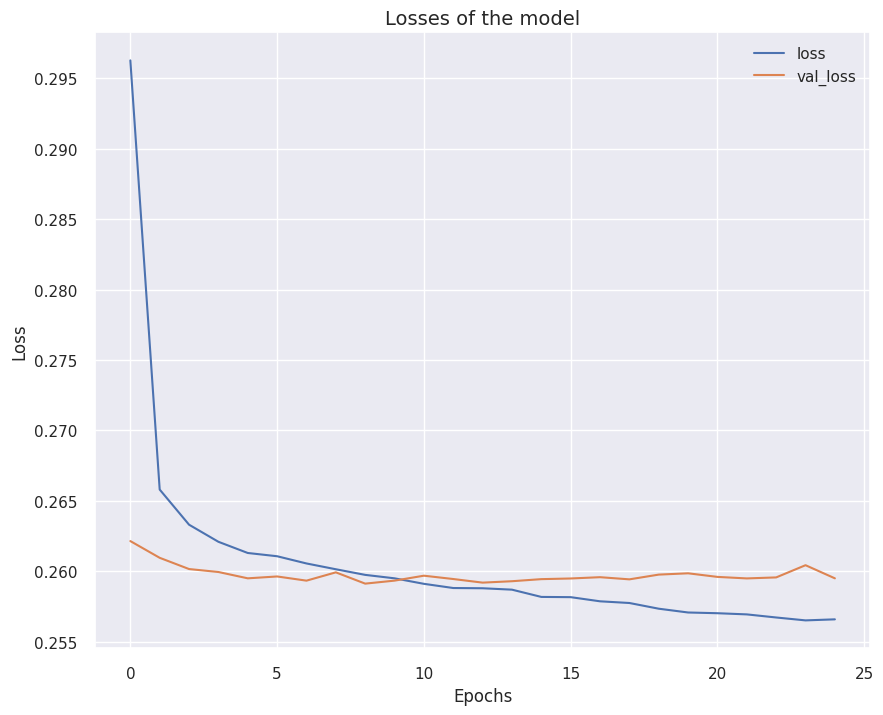

In [224]:
losses.plot(figsize = (10,8))
plt.title("Losses of the model" , fontsize = 14)
plt.xlabel("Epochs" , fontsize = 12)
plt.ylabel("Loss" , fontsize = 12)
plt.show()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [ ]:
# CODE HERE

In [225]:
from sklearn.metrics import classification_report , confusion_matrix

In [226]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step


In [227]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15475
           1       0.88      1.00      0.94     63568

    accuracy                           0.89     79043
   macro avg       0.93      0.72      0.77     79043
weighted avg       0.90      0.89      0.87     79043



In [233]:
confusion_matrix(y_test , predictions)

array([[ 6862,  8613],
       [  183, 63385]])

**TASK: Given the customer below, would you offer this person a loan?**

In [228]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,305327
loan_amnt,12500.0
term,36
int_rate,9.992188
installment,403.290009
annual_inc,40000.0
...,...
30723,0
48052,0
70466,0
86630,0


In [242]:
# CODE HERE
new_customer = scaler.transform(new_customer)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [246]:
new_customer

array([[-1.26505368e-02, -1.50000000e+00, -2.00212765e-01,
        -1.04266733e-02,  5.27672671e-10,  1.70534097e-07,
        -2.81653014e+01, -1.01333333e-02,  0.00000000e+00,
         5.00018623e-01,  1.92634243e-03, -1.46466004e-02,
         8.65051903e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+0

**TASK: Now check, did this person actually end up paying back their loan?**

In [247]:
# CODE HERE
predictions = (model.predict(new_customer.reshape(1, -1)) > 0.5).astype("int32")
print(predictions[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1


In [ ]:
df.iloc[random_ind]["loan_repaid"]

1.0

# GREAT JOB!